In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
tata = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\test_dco\Housing.csv')
tata.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
tata[varlist] = tata[varlist].apply(binary_map)

In [8]:
tata.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [9]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(tata['furnishingstatus'],drop_first = True)
# Add result to main data

tata = pd.concat([tata, status], axis = 1)
tata.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [10]:
tata= tata.drop('furnishingstatus', axis =1)

In [11]:
tata.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [12]:
tata.shape


(545, 14)

In [13]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  semi-furnished   545 non-null    uint8
 13  unfurnished      545 non-null    uint8
dtypes: int64(12), uint8(2)
memory usage: 52.3 KB


In [14]:
# Splitting into train and test set
import sklearn
from sklearn.model_selection import train_test_split
np.random.seed(0)
train_data,test_data = train_test_split(tata, train_size=0.7,random_state=100)
print(train_data.shape)
print(test_data.shape)

(381, 14)
(164, 14)


In [15]:
train_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [16]:
# Here in this will be rescaling target variable only
#Rescaling Features
# Min- max Scaling method
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [17]:
scaler = MinMaxScaler()

In [18]:
train_data['price']= scaler.fit_transform(train_data[['price']])
test_data['price']= scaler.fit_transform(test_data[['price']])

In [19]:
train_data['price'].describe()


count    381.000000
mean       0.260333
std        0.157607
min        0.000000
25%        0.151515
50%        0.221212
75%        0.345455
max        1.000000
Name: price, dtype: float64

In [20]:
test_data['price'].describe()

count    164.000000
mean       0.284725
std        0.190555
min        0.000000
25%        0.151007
50%        0.243624
75%        0.377517
max        1.000000
Name: price, dtype: float64

In [21]:
# Converting into X and y for train and test data
y_train = train_data.pop('price')
X_train = train_data
y_test = test_data.pop('price')
X_test = test_data

In [22]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [23]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
# Instantiate 
dt = DecisionTreeRegressor(random_state=42,max_depth=4,min_samples_leaf=10)

In [26]:
# Fit the Model
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [27]:
# Visualize the decision tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

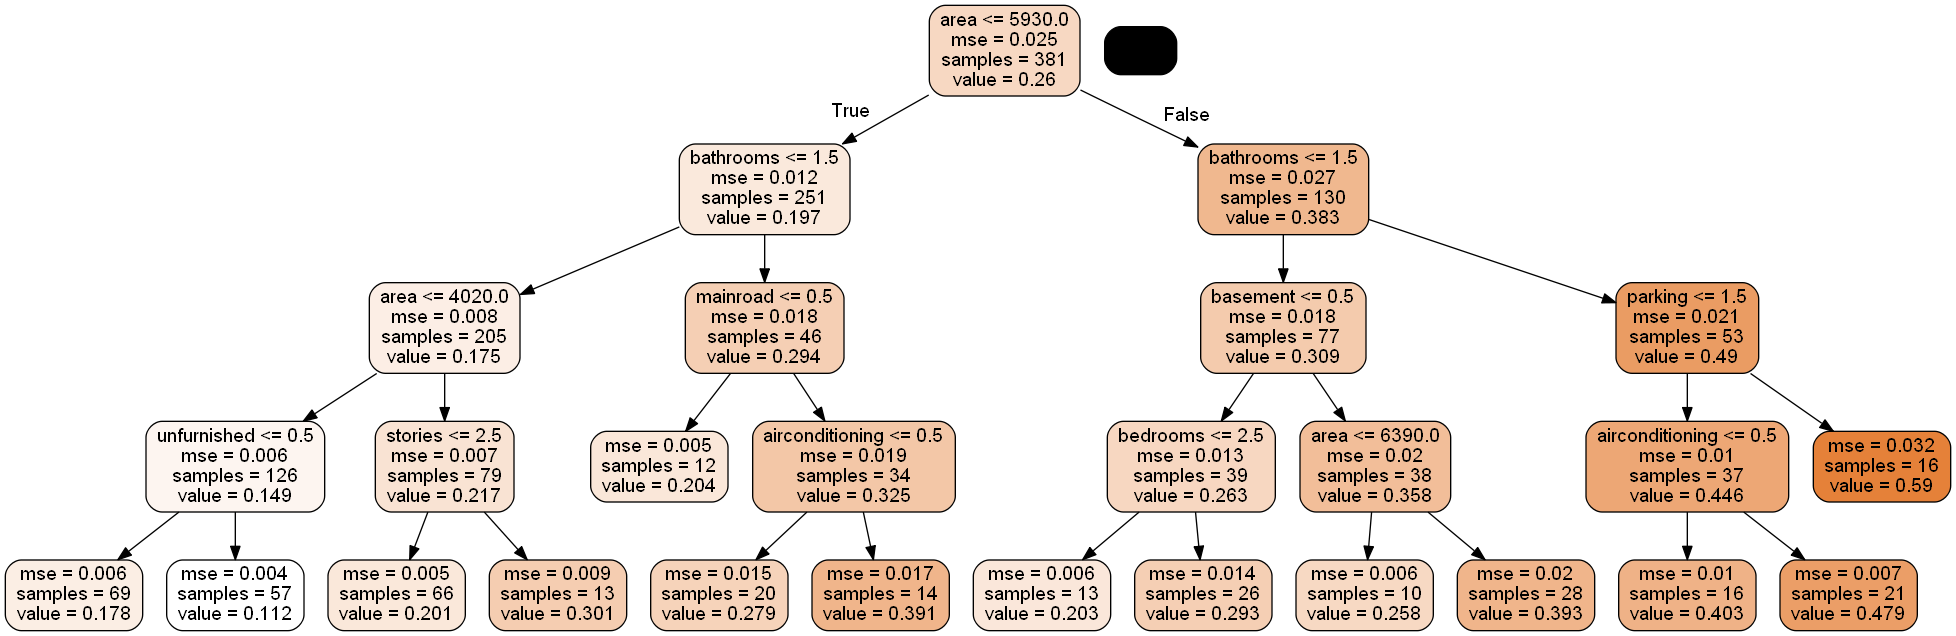

In [28]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [29]:
from sklearn.tree import plot_tree

[Text(2031.1200000000001, 1956.96, 'area <= 5930.0\nmse = 0.025\nsamples = 381\nvalue = 0.26'),
 Text(1015.5600000000001, 1522.0800000000002, 'bathrooms <= 1.5\nmse = 0.012\nsamples = 251\nvalue = 0.197'),
 Text(624.96, 1087.2, 'area <= 4020.0\nmse = 0.008\nsamples = 205\nvalue = 0.175'),
 Text(312.48, 652.3200000000002, 'unfurnished <= 0.5\nmse = 0.006\nsamples = 126\nvalue = 0.149'),
 Text(156.24, 217.44000000000005, 'mse = 0.006\nsamples = 69\nvalue = 0.178'),
 Text(468.72, 217.44000000000005, 'mse = 0.004\nsamples = 57\nvalue = 0.112'),
 Text(937.44, 652.3200000000002, 'stories <= 2.5\nmse = 0.007\nsamples = 79\nvalue = 0.217'),
 Text(781.2, 217.44000000000005, 'mse = 0.005\nsamples = 66\nvalue = 0.201'),
 Text(1093.68, 217.44000000000005, 'mse = 0.009\nsamples = 13\nvalue = 0.301'),
 Text(1406.16, 1087.2, 'mainroad <= 0.5\nmse = 0.018\nsamples = 46\nvalue = 0.294'),
 Text(1249.92, 652.3200000000002, 'mse = 0.005\nsamples = 12\nvalue = 0.204'),
 Text(1562.4, 652.3200000000002, 'air

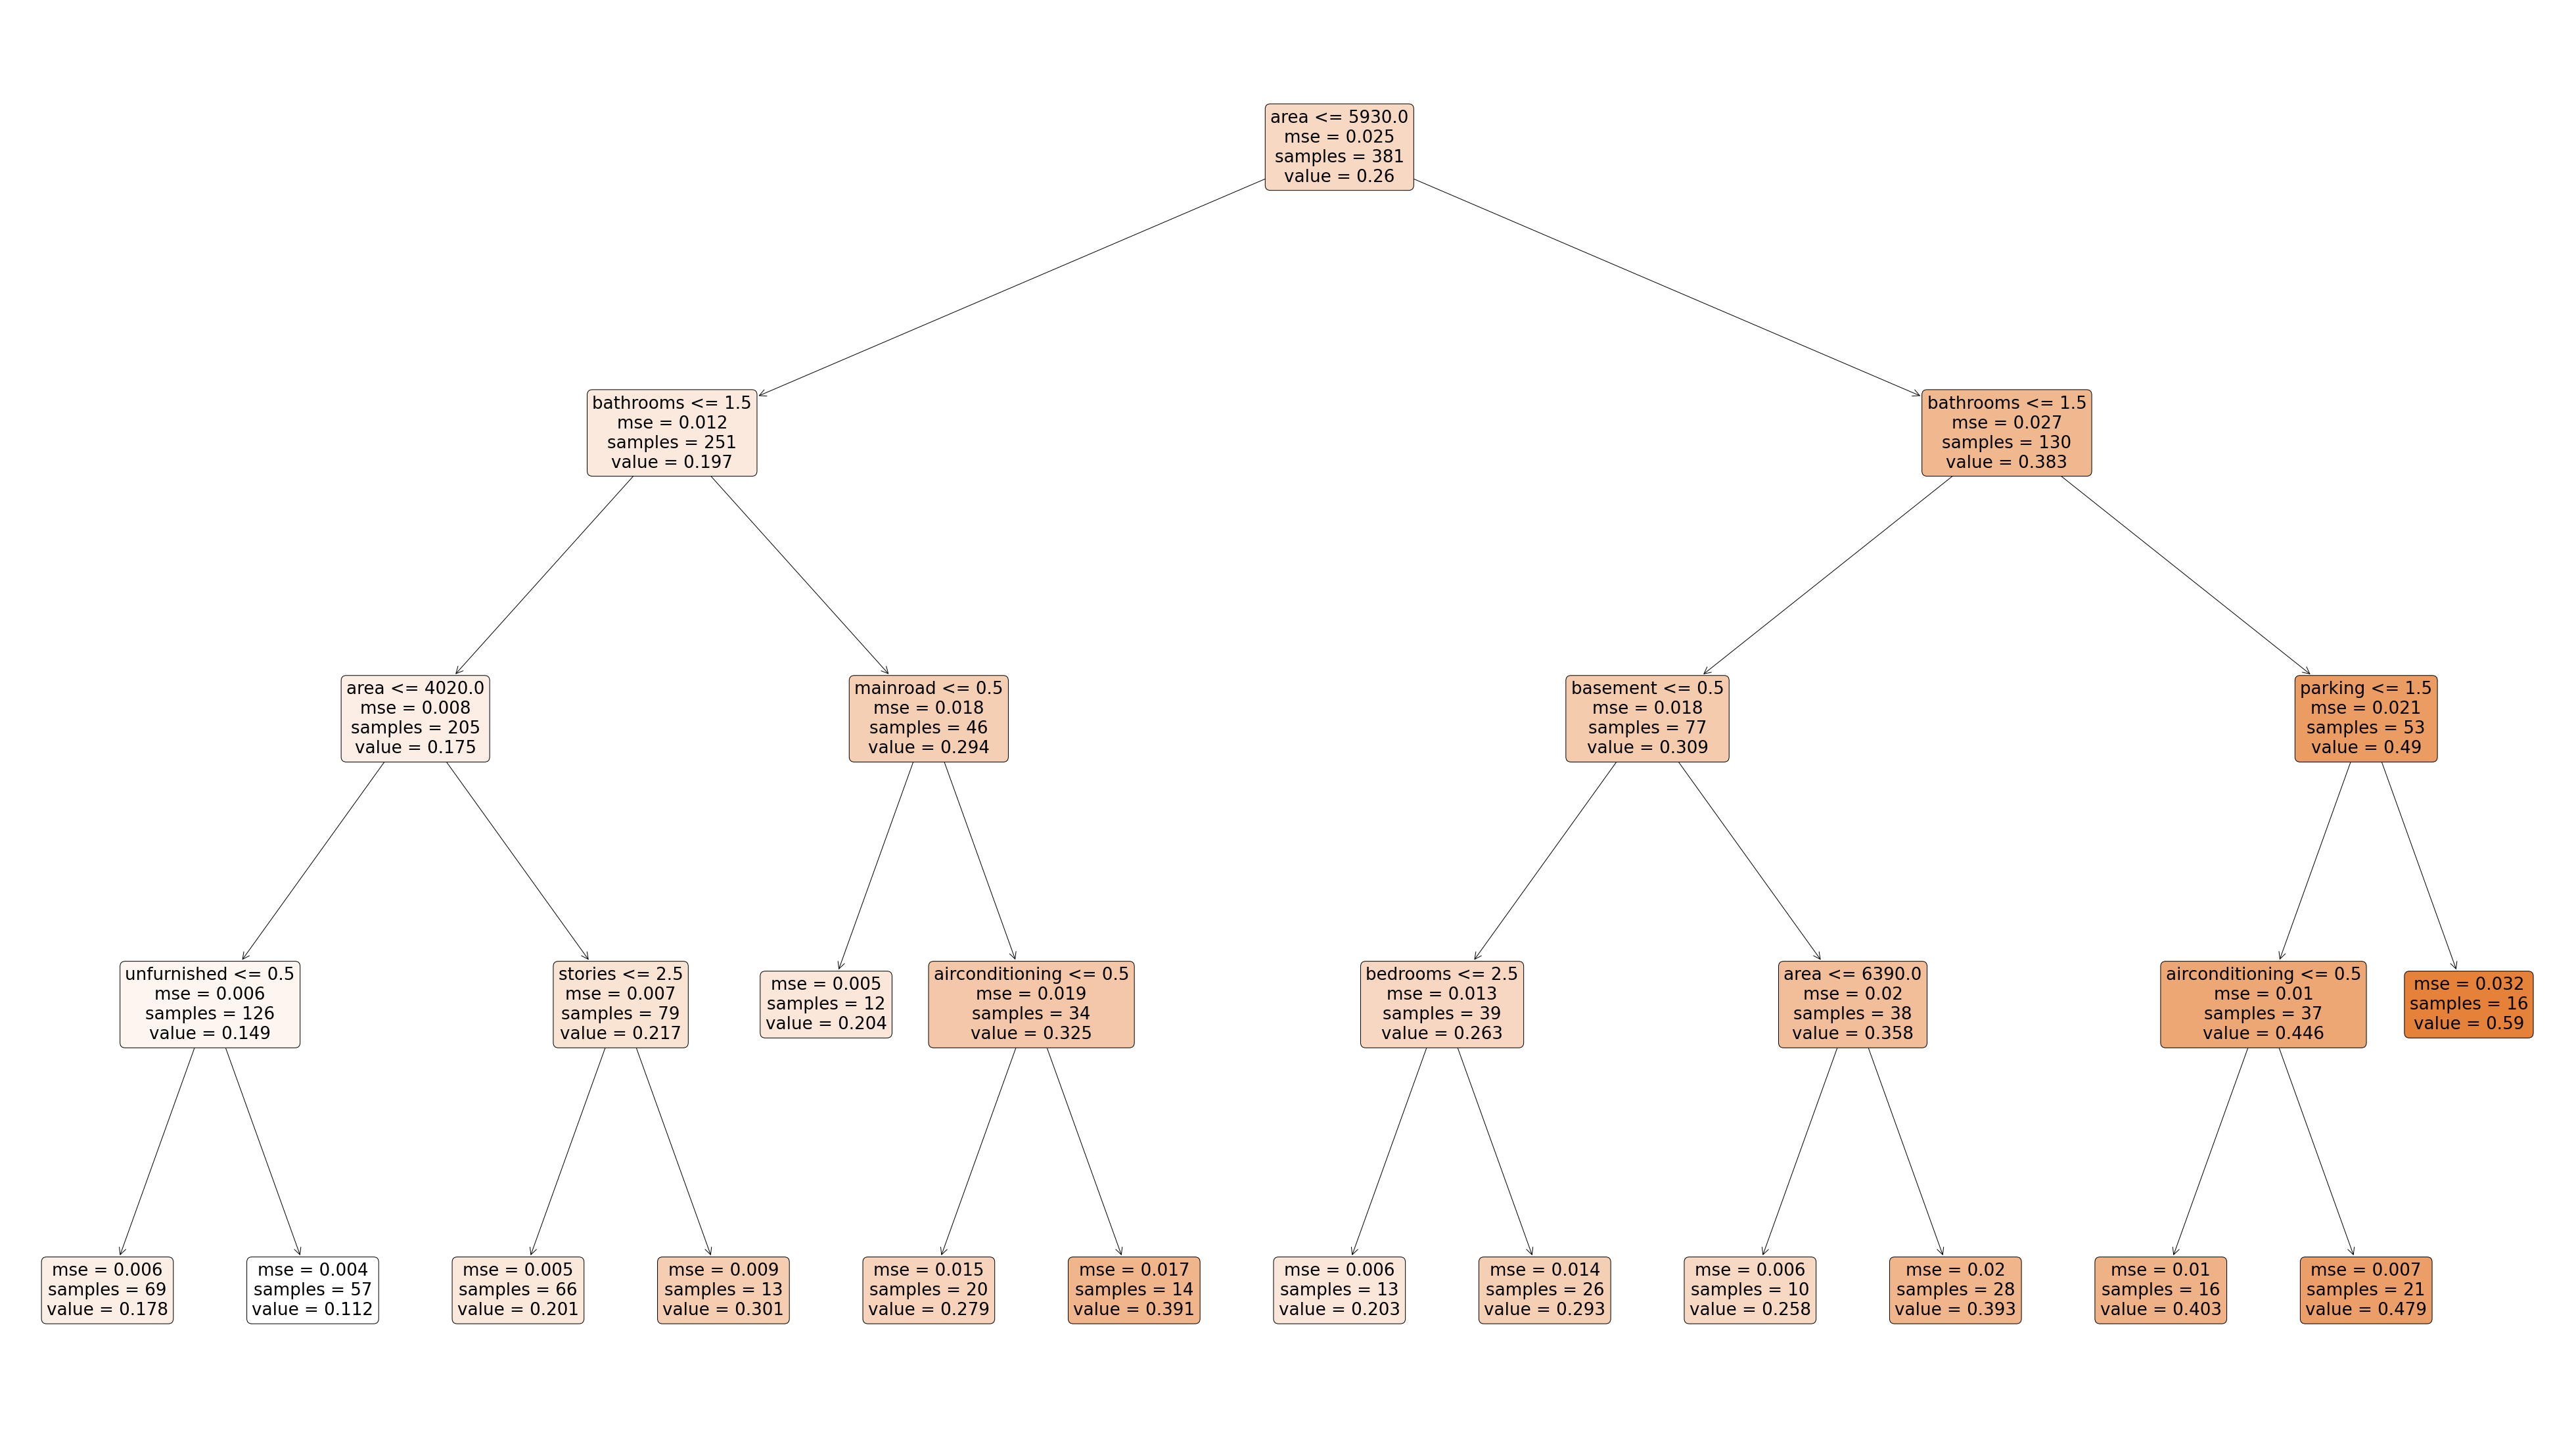

In [30]:
plt.figure(figsize=(70,40))
plot_tree(dt, filled=True, rounded=True,
                feature_names=X_train.columns, 
                fontsize= None)

In [31]:
y_train_pred= dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_train,y_train_pred)

0.6234560022579934

In [34]:
r2_score(y_test,y_test_pred)

0.5130740021517648

# Using Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
# Instantiate 
RF = RandomForestRegressor(random_state =42,n_jobs=-1,max_depth =5, min_samples_leaf =10)

In [37]:
#Fit
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [51]:
sample = RF.estimators_[20]

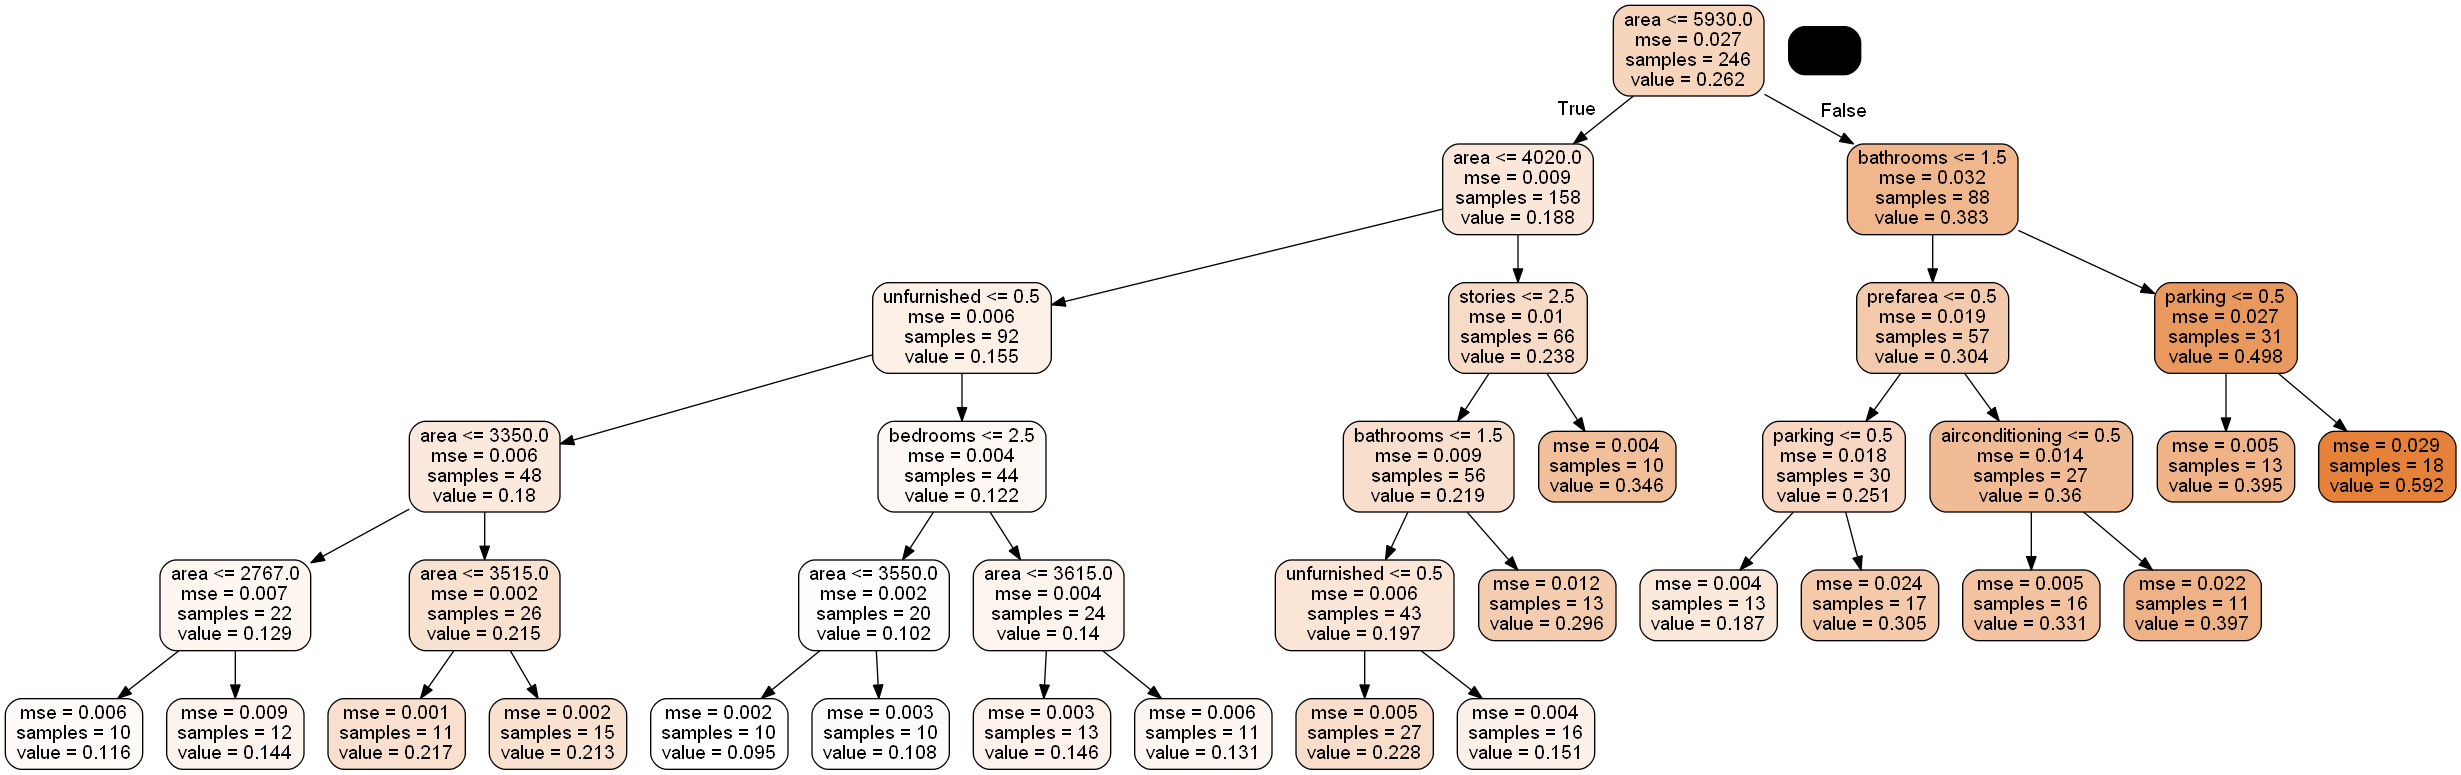

In [52]:
dot_data = StringIO()  

export_graphviz(sample, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [53]:
y_train_predRF = RF.predict(X_train)
y_test_predRF =RF.predict(X_test)

In [54]:
r2_score(y_train,y_train_predRF)

0.678108218278368

In [55]:
r2_score(y_test,y_test_predRF)

0.5556735487271589

In [58]:
RF.feature_importances_


array([0.52087594, 0.01381103, 0.26738773, 0.01914681, 0.00587498,
       0.00817021, 0.02371991, 0.        , 0.04360154, 0.03228028,
       0.02345068, 0.00412213, 0.03755875])

In [61]:
DF_RF = pd.DataFrame({'varname':X_train.columns,'imp':RF.feature_importances_})
DF_RF.sort_values(by= 'imp',ascending =False)

,varname,imp
0,area,0.520876
2,bathrooms,0.267388
8,airconditioning,0.043602
12,unfurnished,0.037559
9,parking,0.032280
6,basement,0.023720
10,prefarea,0.023451
3,stories,0.019147
1,bedrooms,0.013811
5,guestroom,0.008170
